In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


### Loading Required Libraries

In [25]:
# Data manipulation libraries
import pandas as pd
import numpy as np

##### Scikit Learn modules needed for Logistic Regression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder,MinMaxScaler , StandardScaler

# Plotting libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)
%matplotlib inline

In [3]:
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [49]:
# Train & Test split
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:-1],df["Class"],test_size=0.20,
                                                    random_state=21)

print('Shape of Training Xs:{}'.format(x_train.shape))
print('Shape of Test Xs:{}'.format(x_test.shape))
print('Shape of Training y:{}'.format(y_train.shape))
print('Shape of Test y:{}'.format(y_test.shape))

Shape of Training Xs:(227845, 30)
Shape of Test Xs:(56962, 30)
Shape of Training y:(227845,)
Shape of Test y:(56962,)


In [31]:
# Build Model
clf = RandomForestClassifier(criterion= "entropy",random_state= 42)
clf.fit(x_train, y_train)
y_predicted = clf.predict(x_test)
score=clf.score(x_test,y_test);#testing the linear regression model

In [32]:
print("Accuracy % of Random forest on test data: {}".format(score))

Accuracy % of Random forest on test data: 0.9998333333333334


In [50]:
print("Values of label in test data: \n{}".format(y_test.value_counts()))

Values of label in test data: 
0    56853
1      109
Name: Class, dtype: int64


In [34]:
# Confusion Matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predicted)
np.set_printoptions(precision=2)
cnf_matrix

array([[5990,    0],
       [   1,    9]])

In [35]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[5990    0]
 [   1    9]]
Normalized confusion matrix
[[1.  0. ]
 [0.1 0.9]]


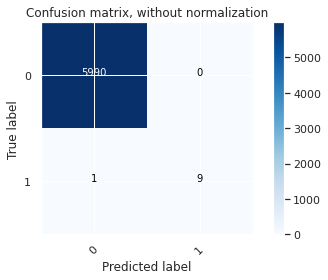

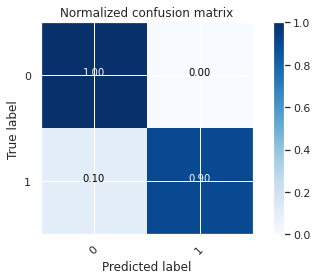

In [36]:
#With Normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= [0,1],
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= [0,1], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [37]:
# ## Below packages are needed for Hyper Parameter Tuning of an Algorithm in Scikit Learn
# from sklearn.impute import SimpleImputer
# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer

In [38]:
# df.shape

(284807, 31)

In [39]:
# # We create the preprocessing pipelines for both numeric and categorical data.
# numeric_features = df.columns[:-1]
# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='mean')),
#     ('scaler', MinMaxScaler())])

# # categorical_features = 
# # categorical_transformer = Pipeline(steps=[
# #     ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
# #     ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#         #('cat', categorical_transformer, categorical_features)
#     ])

# # Append classifier to preprocessing pipeline.
# # Now we have a full prediction pipeline.
# clf = Pipeline(steps=[('preprocessor', preprocessor),
#                       ('classifier', RandomForestClassifier(random_state= 42))])

In [40]:
# param_grid = {
#     'preprocessor__num__imputer__strategy': ['mean', 'median'],
#     'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler()],
#     'classifier__criterion': ["gini","entropy"],
# #     'classifier__max_features': ["auto","sqrt","log2"],
# #     'classifier__max_depth':[2,4,6],
# #     'classifier__n_estimators':[10,50,150,200]
# }

# grid_search = GridSearchCV(clf, param_grid, cv=10, iid=False,verbose = 1,n_jobs= -1)
# grid_search.fit(x_train, y_train)

# print(("best Model from grid search: %.3f"
#        % grid_search.score(x_test, y_test)))
# # Print your best combination of hyper parameters
# print("Optimum setting of hyperparameters:................")
# grid_search.best_params_

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  3.3min finished
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


best Model from grid search: 1.000
Optimum setting of hyperparameters:................


{'classifier__criterion': 'gini',
 'preprocessor__num__imputer__strategy': 'mean',
 'preprocessor__num__scaler': StandardScaler()}